importing all the libraries and datasets for the regression model

In [90]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Using the imported california dataset for the test

In [91]:
dataset = fetch_california_housing()

printing the shape of the dataset imported

In [92]:
print(dataset.data.shape)

(20640, 8)


Checking the column names of the dataset

In [93]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Converting the dataset into a pandas dataframe

In [94]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 8.32520  41.00000   6.98413    1.02381   322.00000   2.55556  37.88000   
1 8.30140  21.00000   6.23814    0.97188  2401.00000   2.10984  37.86000   
2 7.25740  52.00000   8.28814    1.07345   496.00000   2.80226  37.85000   
3 5.64310  52.00000   5.81735    1.07306   558.00000   2.54795  37.85000   
4 3.84620  52.00000   6.28185    1.08108   565.00000   2.18147  37.85000   

   Longitude  
0 -122.23000  
1 -122.22000  
2 -122.24000  
3 -122.25000  
4 -122.25000  


Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

Model should predict the average number of household members and median income of household if i provide all the remaining data

Defining the training dataset with the columns
The columns we are passing are HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude

In [95]:
X= df[['HouseAge','AveRooms','AveBedrms','Population','Latitude','Longitude','AveOccup']]
Y= df[['MedInc']]

In [96]:
print(Y)

       MedInc
0     8.32520
1     8.30140
2     7.25740
3     5.64310
4     3.84620
...       ...
20635 1.56030
20636 2.55680
20637 1.70000
20638 1.86720
20639 2.38860

[20640 rows x 1 columns]


In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

applied the algorithm to the model and trained using the train dataset

In [111]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
print(" Model Trained Successfully!")
print("\nIntercept (b):", model.intercept_)
print("Coefficients (m values):", model.coef_)

 Model Trained Successfully!

Intercept (b): [-48.12943769]
Coefficients (m values): [[-1.15182839e-02  1.04944781e+00 -4.91381190e+00 -2.94482440e-05
  -6.80482726e-01 -6.38134568e-01  4.78768332e-03]]


Now lets try to check the model with the X_test

In [113]:
prediction = model.predict(X_test)
print(prediction)

[[2.34254886]
 [3.23511901]
 [1.99713418]
 ...
 [2.54351208]
 [3.81838909]
 [2.29173637]]


In [115]:
print(prediction.shape)


(6192, 1)


Plotting it in the graph

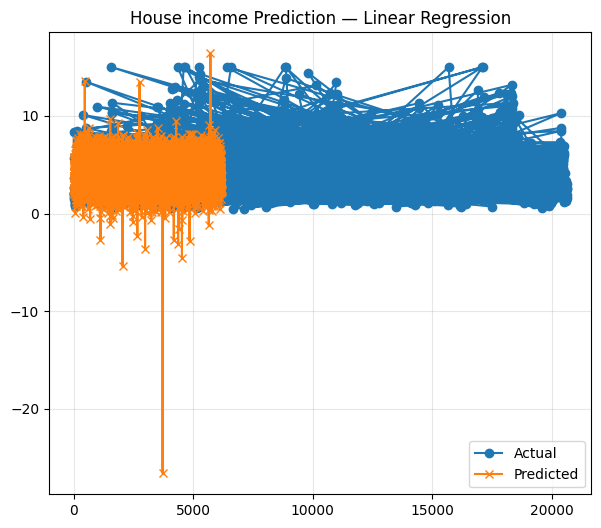

In [119]:
plt.figure(figsize=(7,6))
plt.plot(Y_test, label='Actual', marker='o')
plt.plot(prediction, label='Predicted', marker='x')
plt.title("House income Prediction — Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# converting the values to the standard scaler

In [125]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [127]:
cls = LinearRegression()
cls.fit(x_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Selecting the confusion matrix on how the code is analysing the data

checking how accurate the model is to predict

In [129]:
score = accuracy_score(Y_test,prediction)
print(score)

ValueError: continuous is not supported

checking the classification report for the test and the prediction

In [ ]:
cr= classification_report(Y_test,prediction)
print(cr)

checking the r2 score

In [ ]:
r_score = r2_score(Y_test,prediction)
print(r_score)

Checking the mean absoulte error

In [ ]:
mae = mean_absolute_error(Y_test,prediction)
print(mae)